# Homework 4 (100 points)
## Due: Tuesday, Sept 28 @ 6:30 PM 

**The very first thing you should do is save your own copy of this Homework by clicking on File -> "Save a copy in Drive"**

This homework is divided into 4 sections which each perform different tasks on the initial data provided.  Read the data description below carefully to understand the data, then work on each section.

When you complete this assignment, **please submit 1 file and 1 link via Canvas before the deadline.**

1.   Your Jupyter Notebook code as a .ipynb file (File -> "Download .ipynb")
2.   As a comment on your .ipynb submission please include a link to your Google CoLab Jupyter notebook. Click the "Share" button in the top right.  Ensure that anyone with the link has at least "Commenter" access. **Once you submit your HW on Canvas, please do not make any more edits to the Jupyter notebook until after your HW is graded**

Please use the naming convention:  

**firstname_lastname_homework4.ipynb**

**Until both steps 1 and 2 have been completed, your assignment is considered INCOMPLETE and you will receive -10% per day late until the assignment is completed.**


## Data Description

For this HW, we will be using a dataset of around 7K books with data on title, subtitle, authors, categories, thumbnail url, description, published year, average rating, and number of ratings.

You can download this dataset from the link below or from canvas as `books.csv`

Link to dataset: https://www.kaggle.com/dylanjcastillo/7k-books-with-metadata


In [87]:
import pandas as pd
import seaborn as sns
books = pd.read_csv('/content/drive/MyDrive/Data/books.csv', low_memory=False)

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
books.head(3)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0


## Section 1: Top Authors
**20 points**

Produce the chart below, which shows the top 10 authors by count of books written in this dataset.

Hints:
- Use `.rename()` to rename columns
- Use `sns.catplot(kind="bar", color="teal" ... )`



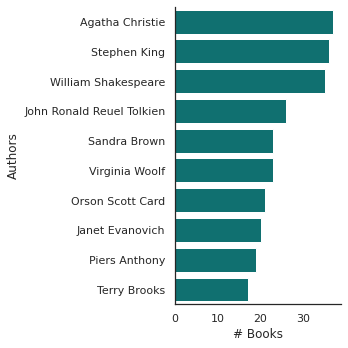

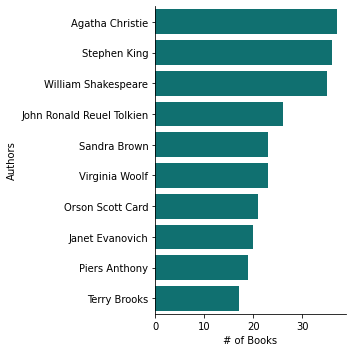

In [92]:
top_authors = books.groupby(by="authors", as_index=False)['title'].count()
top_authors.rename(columns={'authors': "Authors", 'title': '# of Books'}, inplace=True)
top_authors.sort_values(by='# of Books', ascending=False, inplace=True)
sns.catplot(kind="bar", data=top_authors.head(10), x='# of Books', y="Authors", color="teal")


## Section 2: Page Counts by Category
**20 points**

Create the following chart showing the distribution of page counts by category. 


*   Compare the following categories: 
  * Comics & Graphic Novels
  * Juvenile Fiction
  * History
  * Philosophy
*   Remove any books with > 1000 pages (the outliers)
*   Use `sns.displot` with `kind="hist"` (a histogram)
  *   Try different numbers of bins with `bins=` to find a good balance
  *   Plot multiple charts (one per category) on the FacetGrid
  *   Use `kde=True` to better visualize the distribution



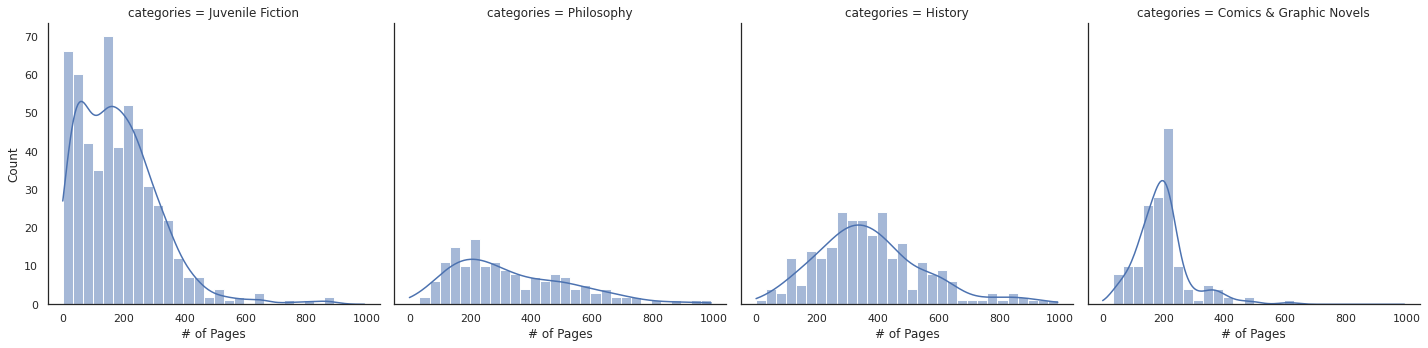

In [196]:
genres = ["Comics & Graphic Novels","Juvenile Fiction", "History", "Philosophy"]
page_count = books[(books.categories.isin(genres)) & (books.num_pages<=1000)]
page_count.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
35,9780006646006,000664600X,Ocean Star Express,NaN,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0
98,9780020442608,0020442602,The voyage of the Dawn Treader,NaN,Clive Staples Lewis,Juvenile Fiction,http://books.google.com/books/content?id=fDD3C...,"The ""Dawn Treader"" is the first ship Narnia ha...",1970.0,4.09,216.0,2869.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0
104,9780024266408,002426640X,The Presocratics,NaN,Philip Wheelwright,Philosophy,http://books.google.com/books/content?id=V45eM...,Library of Liberal Arts title.,1966.0,4.04,352.0,199.0


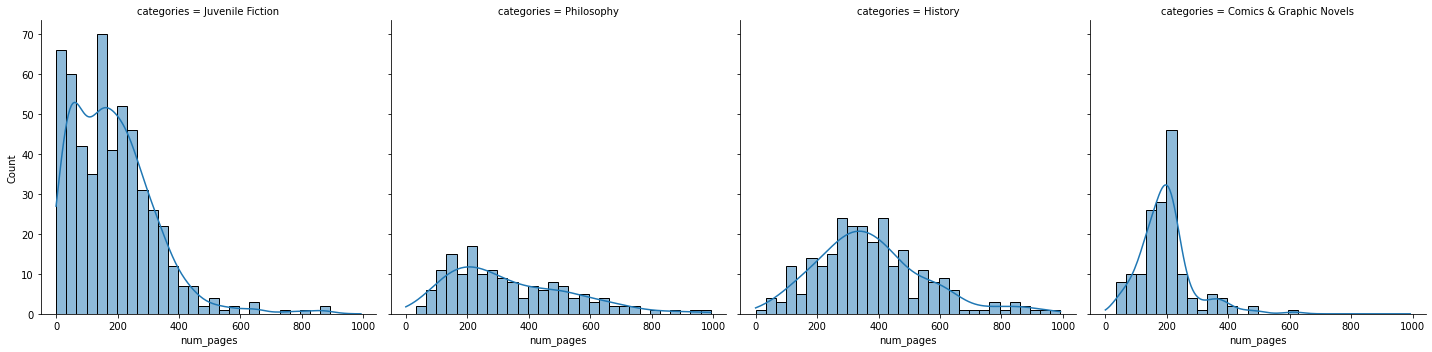

In [204]:
sns.displot(kind='hist', x='num_pages', kde=True, col='categories', data=page_count, bins=30)

## Section 3: Rating Comparison for Top Authors
**20 points for each part (Total 40 points)**

**Part 1:**

Create a box plot as shown below showing the distribution of `average_rating` for the set of authors provided below.  (Color used is `salmon`)

Make sure to rename the axes.



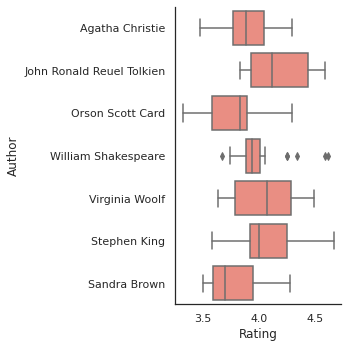

In [116]:
books.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

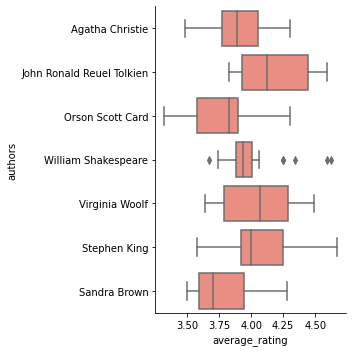

In [197]:
author = [
    "Agatha Christie", 
    "Virginia Woolf", 
    "Stephen King", 
    "William Shakespeare", 
    "John Ronald Reuel Tolkien",
    "Sandra Brown",
    "Orson Scott Card"
]

new_lst = books[(books.authors.isin(authors)) & (books.average_rating)]
sns.catplot(kind='box', y='authors', x='average_rating', data=new_lst, color="salmon")

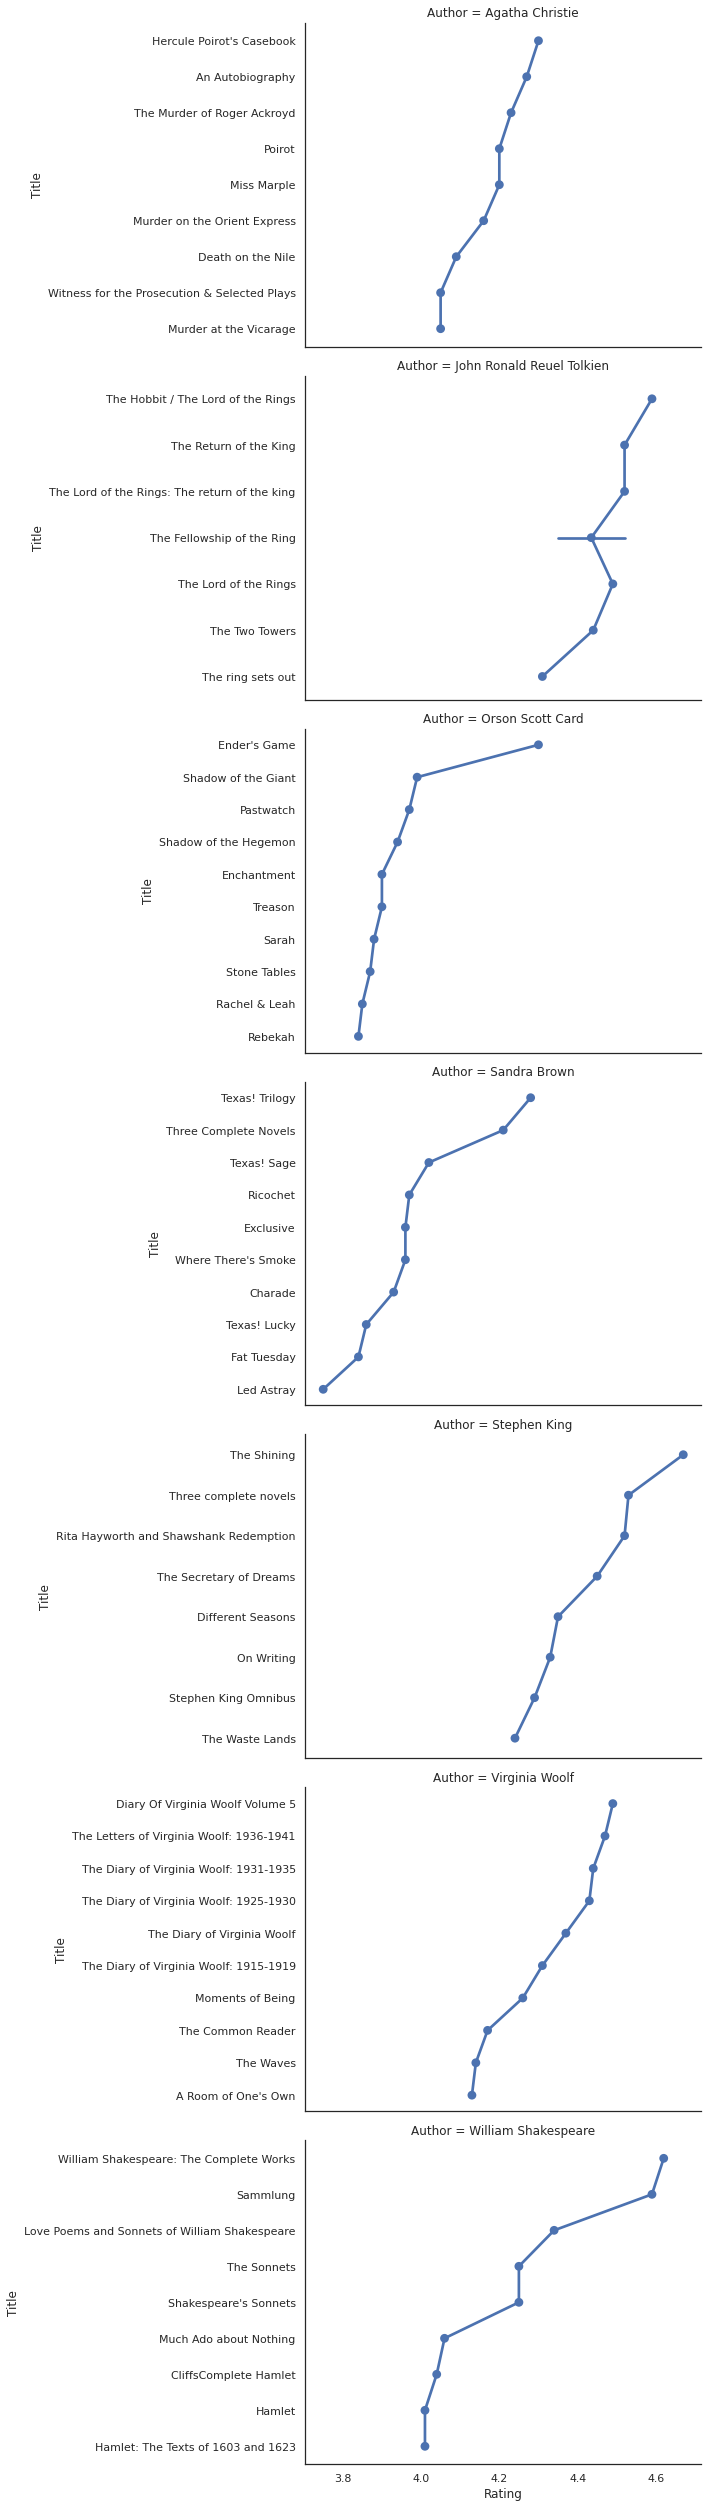

**Part 2:**

Create a point plot showing each author's top 10 books (by average rating), sorted from highest to lowest.  This will help identify which authors are "one hit wonders" and which ones are more consistent across their novels. 

Hints:
*   You will need to sort by `average_rating` **within** each author group. To do this, first write a function called `sort_and_top_10`.  This function will take a pandas dataframe as input, then sort by rating in descending order and grab the top 10 rows only.
*   Next group by `authors`, then use `apply` and pass in your `sort_and_top_10` function to `apply` to sort each author group by the rating.
*   When plotting, use `sns.catplot` and `kind="point"`. 
*  Set `sharey` to False as each chart will have different values on the y-axis (the book titles) so we don't want to share this axis.
*  Use `aspect` to increase the width of the charts to make it more readable 



In [ ]:
new_lst.info()

In [199]:
def sort_and_top_10(new_lst):
  new_lst = new_lst.sort_values(by=["average_rating"], ascending=False)
  return new_lst.head(10)

In [200]:
new_lst = new_lst.groupby(by=["authors"], as_index=False)

In [202]:
new_lst = new_lst.apply(sort_and_top_10)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


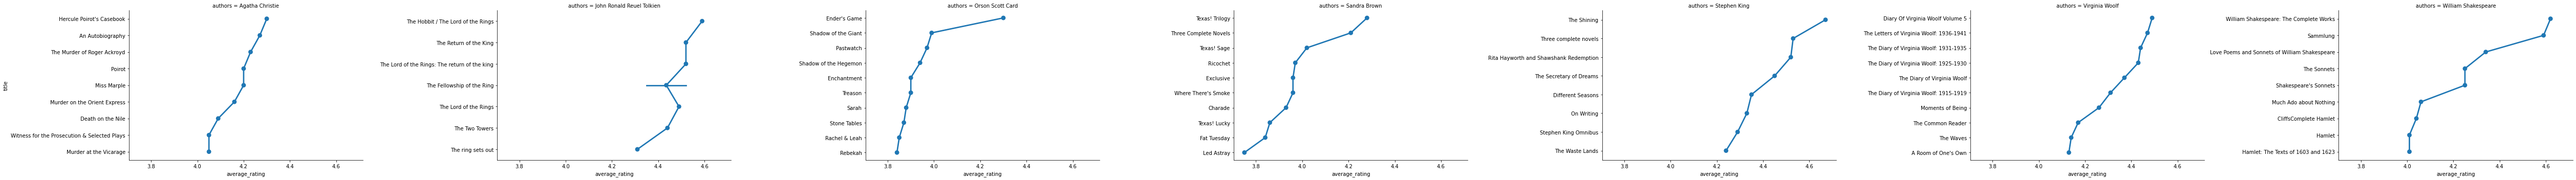

In [208]:
sns.catplot(kind="point", data=new_lst, x="average_rating", y="title", col="authors", sharey=False, aspect=2)

## Section 4: Create your own visualization
**20 points (15 points for the visual, 5 points for the insight)**

Use this books dataset to create your own visualization of reasonable complexity (aggregate and/or filter the data first, then visualize with seaborn).  Then write 2-3 sentences about the insight gained from your visualization.



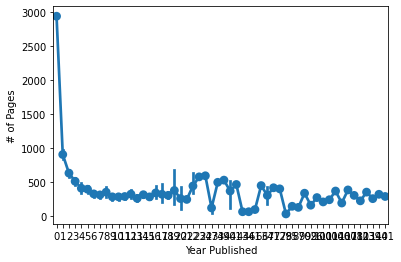

In [212]:
own_visual = books.groupby(by="num_pages", as_index=False)['published_year'].count()
own_visual.rename(columns={'num_pages': "# of Pages", 'published_year': 'Year Published'}, inplace=True)
own_visual.sort_values(by='Year Published', ascending=False, inplace=True)
sns.pointplot(data=own_visual, y='# of Pages', x='Year Published')

In setting up my own visualization I aimed to compare the number of pages in the data set books with the year it was published. I was expecting to see the number of pages decrease as the years got closer to the present day with the assumption that books will become shorter in page count overtime. With the execption of a few early books with large page counts, the visualization shows a large number of books published around the same years were ~400 pages then they seem to vary slightly more for a period only to return to ~400 as they reach the more recent years published.